In [660]:
import numpy as np
import pandas as pd
from biosppy.signals import emg
from biosppy import plotting
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.cluster import KMeans

In [661]:
from pathlib import Path

data_folder = Path("FastBaudEMG/")

file_to_open = data_folder / "TripleREST.txt"

f = open(file_to_open)

print(f.read())

2
a0.71
b0.55
c1.06
a0.72
b0.56
c1.07
a0.73
b0.56
c1.07
a0.72
b0.55
c1.06
a0.71
b0.53
c1.01
a0.69
b0.55
c1.03
a0.71
b0.57
c1.07
a0.71
b0.54
c1.01
a0.68
b0.56
c1.04
a0.70
b0.57
c1.07
a0.71
b0.54
c1.01
a0.68
b0.56
c1.04
a0.70
b0.56
c1.07
a0.71
b0.54
c1.02
a0.68
b0.55
c1.04
a0.70
b0.56
c1.07
a0.71
b0.54
c1.02
a0.68
b0.55
c1.04
a0.69
b0.56
c1.07
a0.72
b0.54
c1.02
a0.68
b0.54
c1.05
a0.70
b0.56
c1.07
a0.72
b0.55
c1.03
a0.68
b0.54
c1.05
a0.70
b0.55
c1.07
a0.72
b0.55
c1.03
a0.69
b0.54
c1.05
a0.70
b0.56
c1.07
a0.73
b0.55
c1.04
a0.69
b0.53
c1.05
a0.71
b0.54
c1.07
a0.73
b0.55
c1.04
a0.69
b0.52
c1.05
a0.71
b0.54
c1.07
a0.73
b0.55
c1.04
a0.69
b0.53
c1.04
a0.71
b0.54
c1.07
a0.73
b0.56
c1.05
a0.70
b0.53
c1.04
a0.71
b0.54
c1.06
a0.73
b0.56
c1.05
a0.70
b0.53
c1.04
a0.72
b0.55
c1.06
a0.74
b0.57
c1.05
a0.71
b0.54
c1.04
a0.72
b0.56
c1.06
a0.74
b0.57
c1.06
a0.71
b0.54
c1.03
a0.73
b0.56
c1.05
a0.74
b0.57
c1.06
a0.72
b0.54
c1.02
a0.74
b0.56
c1.04
a0.75
b0.57
c1.06
a0.73
b0.54
c1.01
a0.73
b0.56
c1.04
a0.75
b0

In [662]:
f = open("ARest.txt","w+")
f1 = open("BRest.txt", "w+")
f2 = open("CRest.txt", "w+")
import fileinput
for lines in fileinput.FileInput('FastBaudEMG/TripleREST.txt', inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a':  f.write(lines[1:] + "\n")
    if lines[0] == 'b':  f1.write(lines[1:] + "\n")
    if lines[0] == 'c':  f2.write(lines[1:] + "\n")
    print(lines)

In [663]:
Arest = np.loadtxt('ARest.txt')
Brest = np.loadtxt('BRest.txt')
Crest = np.loadtxt('CRest.txt')

In [664]:
#Calculate RestAvg
Arestavg = np.average(Arest)
Brestavg = np.average(Brest)
Crestavg = np.average(Crest)
Arestavg


0.7642912344925769

## Process and Strip Triple Index Hard into ATIH, BTIH and CTIH

In [665]:
ATIH = np.array([0])
BTIH = np.array([0])
CTIH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleIndexHard1.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATIH = np.append(ATIH, [float(lines[1:])])
    if lines[0] == 'b': BTIH = np.append(BTIH, [float(lines[1:])])
    if lines[0] == 'c': CTIH = np.append(CTIH, [float(lines[1:])])
    print(lines)
ATIH = ATIH[1:]
BTIH = BTIH[1:]
CTIH = CTIH[1:]

In [666]:
ATIH.tolist()

[0.98,
 0.99,
 1.01,
 1.02,
 1.01,
 0.96,
 0.97,
 1.0,
 0.96,
 0.97,
 1.0,
 0.95,
 0.97,
 1.0,
 0.95,
 0.98,
 1.0,
 0.95,
 0.98,
 1.01,
 0.96,
 0.99,
 1.0,
 0.96,
 0.98,
 1.01,
 0.97,
 1.01,
 1.03,
 0.99,
 1.03,
 1.04,
 1.01,
 1.03,
 1.05,
 1.01,
 1.01,
 1.04,
 1.02,
 1.04,
 1.06,
 1.03,
 1.02,
 1.04,
 1.03,
 1.01,
 1.01,
 1.0,
 1.0,
 1.01,
 1.0,
 0.97,
 0.98,
 0.98,
 0.94,
 0.95,
 0.98,
 0.95,
 0.97,
 0.99,
 0.94,
 0.95,
 0.96,
 0.92,
 0.93,
 0.95,
 0.9,
 0.91,
 0.94,
 0.89,
 0.9,
 0.95,
 0.9,
 0.91,
 0.95,
 0.9,
 0.91,
 0.94,
 0.9,
 0.91,
 0.97,
 0.93,
 0.95,
 0.98,
 0.94,
 0.97,
 1.0,
 0.95,
 0.97,
 1.01,
 0.97,
 0.97,
 1.0,
 0.96,
 0.97,
 0.99,
 0.96,
 0.98,
 0.98,
 0.95,
 0.95,
 0.97,
 0.95,
 0.96,
 0.98,
 0.96,
 0.97,
 0.98,
 0.98,
 0.97,
 0.98,
 0.97,
 0.95,
 0.96,
 0.96,
 0.95,
 0.97,
 0.98,
 0.94,
 0.95,
 0.98,
 0.92,
 0.95,
 0.99,
 0.95,
 0.97,
 1.0,
 0.95,
 0.97,
 1.01,
 0.95,
 0.97,
 1.02,
 0.97,
 1.0,
 1.02,
 0.96,
 0.98,
 1.02,
 0.98,
 1.0,
 1.01,
 0.96,
 0.96,
 1.01,
 1.

In [667]:
ATIH.size

5287

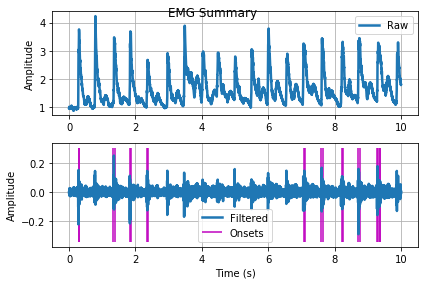

In [668]:
out = emg.emg(signal=ATIH, sampling_rate=(BTIH.size/10), show=True)

## Process and Strip Thumb Hard into ATTH, BTTH and CTTH

In [669]:
ATTH = np.array([0])
BTTH = np.array([0])
CTTH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleThumbHard2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATTH = np.append(ATTH, [float(lines[1:])])
    if lines[0] == 'b': BTTH = np.append(BTTH, [float(lines[1:])])
    if lines[0] == 'c': CTTH = np.append(CTTH, [float(lines[1:])])
    print(lines)
ATTH = ATTH[1:]
BTTH = BTTH[1:]
CTTH = CTTH[1:]

In [670]:
ATTH.tolist()

[0.91,
 0.9,
 0.89,
 0.88,
 0.91,
 0.92,
 0.91,
 0.89,
 0.9,
 0.89,
 0.9,
 0.92,
 0.93,
 0.91,
 0.92,
 0.93,
 0.91,
 0.92,
 0.93,
 0.89,
 0.91,
 0.93,
 0.88,
 0.91,
 0.94,
 0.91,
 0.93,
 0.95,
 0.9,
 0.92,
 0.95,
 0.9,
 0.92,
 0.96,
 0.91,
 0.93,
 0.96,
 0.91,
 0.92,
 0.96,
 0.91,
 0.94,
 0.97,
 0.93,
 0.94,
 0.96,
 0.92,
 0.93,
 0.96,
 0.92,
 0.93,
 0.95,
 0.91,
 0.93,
 0.95,
 0.91,
 0.93,
 0.94,
 0.91,
 0.92,
 0.94,
 0.91,
 0.92,
 0.94,
 0.92,
 0.92,
 0.93,
 0.91,
 0.9,
 0.92,
 0.91,
 0.89,
 0.91,
 0.92,
 0.89,
 0.92,
 0.93,
 0.9,
 0.92,
 0.93,
 0.9,
 0.93,
 0.95,
 0.91,
 0.93,
 0.96,
 0.92,
 0.93,
 0.95,
 0.91,
 0.93,
 0.96,
 0.9,
 0.92,
 0.96,
 0.92,
 0.93,
 0.96,
 0.91,
 0.93,
 0.96,
 0.92,
 0.95,
 0.95,
 0.91,
 0.91,
 0.93,
 0.89,
 0.9,
 0.91,
 0.9,
 0.92,
 0.96,
 0.93,
 0.96,
 0.99,
 0.96,
 1.03,
 1.03,
 1.0,
 1.07,
 1.07,
 1.05,
 1.07,
 1.08,
 1.06,
 1.07,
 1.06,
 1.05,
 1.09,
 1.09,
 1.09,
 1.13,
 1.14,
 1.12,
 1.11,
 1.1,
 1.09,
 1.07,
 1.12,
 1.22,
 1.26,
 1.31,
 1.34,
 1.33

In [671]:
BTTH.size

5288

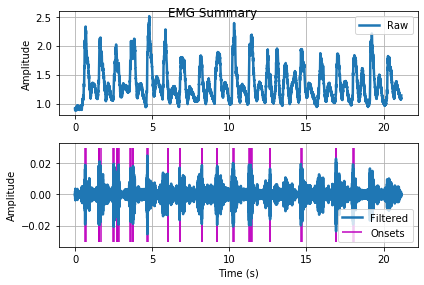

In [672]:
out = emg.emg(signal=ATTH, sampling_rate=(250), show=True)

# Process and Strip Ring Middle Hard into ATRMH, BTRMH and CTRMH

In [673]:
ATRMH = np.array([0])
BTRMH = np.array([0])
CTRMH = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleRMHard1.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATRMH = np.append(ATRMH, [float(lines[1:])])
    if lines[0] == 'b': BTRMH = np.append(BTRMH, [float(lines[1:])])
    if lines[0] == 'c': CTRMH = np.append(CTRMH, [float(lines[1:])])
    print(lines)
ATRMH = ATRMH[1:]
BTRMH = BTRMH[1:]
CTRMH = CTRMH[1:]

In [674]:
CTRMH.tolist()

[0.97,
 0.97,
 0.97,
 0.96,
 0.99,
 0.97,
 0.99,
 1.0,
 0.95,
 0.96,
 1.0,
 0.96,
 0.96,
 0.99,
 0.95,
 0.96,
 0.99,
 0.98,
 1.0,
 1.01,
 0.97,
 0.97,
 0.99,
 0.97,
 0.98,
 0.99,
 0.96,
 0.97,
 0.98,
 0.95,
 0.96,
 0.97,
 0.95,
 0.95,
 0.95,
 0.92,
 0.92,
 0.93,
 0.92,
 0.91,
 0.93,
 0.91,
 0.9,
 0.92,
 0.91,
 0.9,
 0.93,
 0.93,
 0.92,
 0.93,
 0.95,
 0.93,
 0.94,
 0.94,
 0.91,
 0.93,
 0.95,
 0.94,
 0.97,
 0.98,
 0.95,
 0.95,
 0.97,
 0.94,
 0.94,
 0.96,
 0.93,
 0.94,
 0.96,
 0.92,
 0.93,
 0.96,
 0.95,
 0.98,
 1.0,
 0.97,
 0.97,
 1.0,
 0.95,
 0.97,
 1.0,
 0.96,
 0.97,
 0.99,
 0.97,
 0.98,
 0.99,
 0.96,
 0.96,
 0.98,
 0.95,
 0.96,
 0.97,
 0.94,
 0.95,
 0.97,
 0.97,
 0.98,
 0.98,
 0.95,
 0.94,
 0.95,
 0.94,
 0.93,
 0.94,
 0.94,
 0.92,
 0.94,
 0.93,
 0.92,
 0.93,
 0.93,
 0.92,
 0.93,
 0.93,
 0.9,
 0.91,
 0.92,
 0.89,
 0.9,
 0.92,
 0.9,
 0.89,
 0.9,
 0.88,
 0.88,
 0.9,
 0.87,
 0.88,
 0.92,
 0.88,
 0.9,
 0.92,
 0.88,
 0.9,
 0.92,
 0.9,
 0.93,
 0.95,
 0.92,
 0.93,
 0.96,
 0.91,
 0.92,
 0.95,
 

In [675]:
CTRMH.size

5286

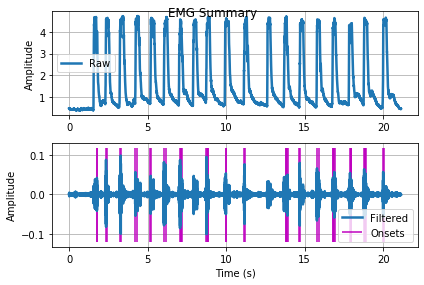

In [676]:
out = emg.emg(signal=BTRMH, sampling_rate=(250), show=True)

# Process and Strip Ring Middle Soft into ATRMS, BTRMS and CTRMS
## Use 1 or 3

In [677]:
ATRMS = np.array([0])
BTRMS = np.array([0])
CTRMS = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleRMSoft2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATRMS = np.append(ATRMS, [float(lines[1:])])
    if lines[0] == 'b': BTRMS = np.append(BTRMS, [float(lines[1:])])
    if lines[0] == 'c': CTRMS = np.append(CTRMS, [float(lines[1:])])
    print(lines)
ATRMS = ATRMS[1:]
BTRMS = BTRMS[1:]
CTRMS = CTRMS[1:]

In [678]:
ATRMS.tolist()

[0.78,
 0.79,
 0.79,
 0.78,
 0.74,
 0.75,
 0.78,
 0.74,
 0.75,
 0.78,
 0.74,
 0.75,
 0.79,
 0.75,
 0.76,
 0.79,
 0.76,
 0.77,
 0.8,
 0.77,
 0.77,
 0.81,
 0.78,
 0.78,
 0.81,
 0.78,
 0.78,
 0.8,
 0.76,
 0.77,
 0.8,
 0.76,
 0.76,
 0.8,
 0.77,
 0.78,
 0.8,
 0.76,
 0.78,
 0.8,
 0.77,
 0.78,
 0.8,
 0.77,
 0.78,
 0.78,
 0.76,
 0.76,
 0.78,
 0.77,
 0.77,
 0.79,
 0.78,
 0.78,
 0.79,
 0.79,
 0.79,
 0.8,
 0.81,
 0.79,
 0.81,
 0.82,
 0.8,
 0.8,
 0.83,
 0.8,
 0.81,
 0.84,
 0.8,
 0.81,
 0.83,
 0.8,
 0.8,
 0.83,
 0.79,
 0.79,
 0.83,
 0.79,
 0.79,
 0.83,
 0.78,
 0.79,
 0.83,
 0.79,
 0.79,
 0.82,
 0.77,
 0.78,
 0.82,
 0.79,
 0.79,
 0.82,
 0.79,
 0.79,
 0.83,
 0.79,
 0.81,
 0.83,
 0.79,
 0.8,
 0.82,
 0.78,
 0.8,
 0.81,
 0.78,
 0.79,
 0.82,
 0.8,
 0.8,
 0.81,
 0.8,
 0.8,
 0.82,
 0.81,
 0.81,
 0.82,
 0.81,
 0.81,
 0.82,
 0.81,
 0.79,
 0.8,
 0.8,
 0.79,
 0.8,
 0.81,
 0.78,
 0.79,
 0.82,
 0.79,
 0.81,
 0.83,
 0.79,
 0.79,
 0.81,
 0.77,
 0.78,
 0.81,
 0.77,
 0.79,
 0.82,
 0.79,
 0.8,
 0.83,
 0.8,
 0.8,
 0.8

In [679]:
BTRMS.size

5288

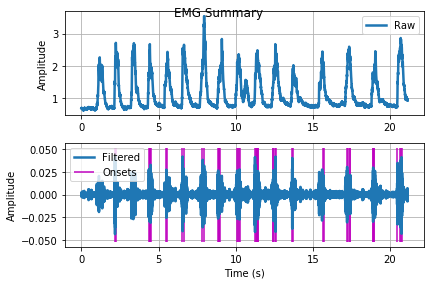

In [680]:
out = emg.emg(signal=BTRMS, sampling_rate=(250), show=True)

# Process and Strip Open Wrist Flex into AOWF, BOWF and COWF

In [681]:
ATOWF = np.array([0])
BTOWF = np.array([0])
CTOWF = np.array([0])
import fileinput
for lines in fileinput.FileInput("FastBaudEMG/TripleOpenWristFlex2.txt", inplace=1): 
    lines = lines.strip()
    if lines == '': continue
    if lines[0] == 'a': ATOWF = np.append(ATOWF, [float(lines[1:])])
    if lines[0] == 'b': BTOWF = np.append(BTOWF, [float(lines[1:])])
    if lines[0] == 'c': CTOWF = np.append(CTOWF, [float(lines[1:])])
    print(lines)
ATOWF = ATOWF[1:]
BTOWF = BTOWF[1:]
CTOWF = CTOWF[1:]

In [682]:
ATOWF.tolist()

[1.09,
 1.08,
 1.11,
 1.12,
 1.11,
 1.13,
 1.1,
 1.11,
 1.12,
 1.09,
 1.1,
 1.11,
 1.06,
 1.08,
 1.1,
 1.06,
 1.09,
 1.09,
 1.05,
 1.09,
 1.08,
 1.04,
 1.07,
 1.06,
 1.03,
 1.05,
 1.04,
 1.01,
 1.05,
 1.05,
 1.02,
 1.05,
 1.06,
 1.03,
 1.06,
 1.06,
 1.04,
 1.05,
 1.06,
 1.03,
 1.04,
 1.06,
 1.04,
 1.05,
 1.07,
 1.06,
 1.06,
 1.08,
 1.07,
 1.06,
 1.07,
 1.08,
 1.06,
 1.08,
 1.08,
 1.05,
 1.08,
 1.08,
 1.05,
 1.08,
 1.09,
 1.05,
 1.07,
 1.09,
 1.05,
 1.08,
 1.09,
 1.05,
 1.08,
 1.08,
 1.05,
 1.09,
 1.09,
 1.06,
 1.08,
 1.1,
 1.07,
 1.1,
 1.09,
 1.06,
 1.07,
 1.06,
 1.03,
 1.06,
 1.07,
 1.02,
 1.06,
 1.06,
 1.03,
 1.05,
 1.05,
 1.01,
 1.04,
 1.05,
 1.01,
 1.03,
 1.04,
 1.01,
 1.03,
 1.05,
 1.04,
 1.05,
 1.06,
 1.03,
 1.02,
 1.03,
 1.0,
 0.98,
 1.01,
 1.01,
 0.99,
 1.01,
 1.0,
 0.97,
 0.99,
 0.99,
 0.97,
 1.0,
 1.01,
 0.97,
 1.0,
 1.02,
 0.99,
 1.02,
 1.03,
 1.0,
 1.03,
 1.03,
 1.01,
 1.08,
 1.07,
 1.05,
 1.1,
 1.09,
 1.07,
 1.13,
 1.1,
 1.09,
 1.14,
 1.15,
 1.1,
 1.09,
 1.2,
 1.2,
 1.19,


In [683]:
CTOWF.size

5288

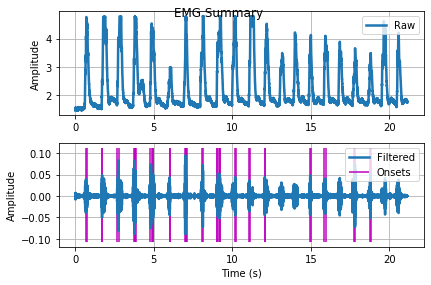

In [684]:
out = emg.emg(signal=CTOWF, sampling_rate=(250), show=True)

In [685]:
classvar = np.zeros(len(ATIH), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

# Start with Triple Index Hard

In [686]:
ATIH.size

5287

In [687]:
dfTIH = pd.DataFrame({'AData':ATIH, 'BData':BTIH, 'CData':CTIH, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})


In [688]:
#df.loc[12:25,'class'] = 0

In [689]:
with pd.option_context("display.max_rows", 500):
    display(dfTIH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.98   0.83   1.48      0     0     0     0      0      0      0  ...   
1      0.99   0.85   1.50      0     0     0     0      0      0      0  ...   
2      1.01   0.87   1.52      0     0     0     0      0      0      0  ...   
3      1.02   0.87   1.53      0     0     0     0      0      0      0  ...   
4      1.01   0.85   1.47      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5282   1.82   1.17   1.70      0     0     0     0      0      0      0  ...   
5283   1.83   1.18   1.66      0     0     0     0      0      0      0  ...   
5284   1.82   1.15   1.64      0     0     0     0      0      0      0  ...   
5285   1.79   1.20   1.67      0     0     0     0      0      0      0  ...   
5286   1.80   1.22   1.65      0     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  
5286     0     0     0     0     0     0    0    0    0        0  

[5287 rows x 23 columns]

# We want to determine our Onset on EMG A since it is what triggers the hardest

In [690]:
for index, row in dfTIH.iterrows():
    if row['AData'] > (.8+Arestavg):
        dfTIH.loc[index, 'class'] = 1

In [691]:
def claculateDF(df, Tval):
    #Calculate MAV
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + df.loc[index+index2, 'AData']
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'MAVA'] = sum/50
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + df.loc[index+index2, 'BData']
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'MAVB'] = sum/50
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + df.loc[index+index2, 'CData']
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'MAVC'] = sum/50
        #Calculate MAVS
    for index, row in df.iterrows():
        if(index+1 < len(df.index)):
            mavs = df.loc[index+1, 'MAVA'] - df.loc[index, 'MAVA']
            df.loc[index, 'MAVSA'] = mavs
    for index, row in df.iterrows():
        if(index+1 < len(df.index)):
            mavs = df.loc[index+1, 'MAVB'] - df.loc[index, 'MAVB']
            df.loc[index, 'MAVSB'] = mavs
    for index, row in df.iterrows():
        if(index+1 < len(df.index)):
            mavs = df.loc[index+1, 'MAVC'] - df.loc[index, 'MAVC']
            df.loc[index, 'MAVSC'] = mavs
        #Calculate SSI
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'AData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'SSIA'] = sum
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'BData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'SSIB'] = sum
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'CData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'SSIC'] = sum
                #Calculate VAR
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'AData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'VARA'] = sum/49
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'BData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'VARB'] = sum/49
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2 < len(df.index)):
                sum = sum + abs(df.loc[index+index2, 'CData'])**2
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'VARC'] = sum/49
                #Calculate RMS
    for index, row in df.iterrows():
        tmp = df.loc[index, 'SSIA']/50
        final = np.sqrt(tmp)
        df.loc[index, 'RMSA'] = final
    for index, row in df.iterrows():
        tmp = df.loc[index, 'SSIB']/50
        final = np.sqrt(tmp)
        df.loc[index, 'RMSB'] = final
    for index, row in df.iterrows():
        tmp = df.loc[index, 'SSIC']/50
        final = np.sqrt(tmp)
        df.loc[index, 'RMSC'] = final
            #Calculate WL
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2+1 < len(df.index)):
                sum = sum + abs((df.loc[index+index2, 'AData'] + df.loc[index+index2+1, 'AData']))
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'WLA'] = sum/50
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2+1 < len(df.index)):
                sum = sum + abs((df.loc[index+index2, 'BData'] + df.loc[index+index2+1, 'BData']))
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'WLB'] = sum/50
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(50):
            if(index+index2+1 < len(df.index)):
                sum = sum + abs((df.loc[index+index2, 'CData'] + df.loc[index+index2+1, 'CData']))
        if(index+index2 < len(df.index)):
            df.loc[index+index2, 'WLC'] = sum/50
                #Calculate Trigger
    for index, row in df.iterrows():
        sum = 0
        for index2 in range(10):
            if(index+index2 < len(df.index)):
                sum = sum + df.loc[index+index2, 'class']
        if(index+index2 < len(df.index)):
            if(sum/10 > .75):
                df.loc[index+index2, 'Trigger'] = Tval
            else:
                df.loc[index+index2, 'Trigger'] = 0

In [692]:
with pd.option_context("display.max_rows", 1000):
    display(dfTIH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.98   0.83   1.48      0     0     0     0      0      0      0  ...   
1      0.99   0.85   1.50      0     0     0     0      0      0      0  ...   
2      1.01   0.87   1.52      0     0     0     0      0      0      0  ...   
3      1.02   0.87   1.53      0     0     0     0      0      0      0  ...   
4      1.01   0.85   1.47      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5282   1.82   1.17   1.70      1     0     0     0      0      0      0  ...   
5283   1.83   1.18   1.66      1     0     0     0      0      0      0  ...   
5284   1.82   1.15   1.64      1     0     0     0      0      0      0  ...   
5285   1.79   1.20   1.67      1     0     0     0      0      0      0  ...   
5286   1.80   1.22   1.65      1     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  
5286     0     0     0     0     0     0    0    0    0        0  

[5287 rows x 23 columns]

In [693]:
print(len(df.index))


5287


In [694]:
claculateDF(dfTIH,1)

In [695]:
dfTIH.head(1000)

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0     0.98   0.83   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
1     0.99   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
2     1.01   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
3     1.02   0.87   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
4     1.01   0.85   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
5     0.96   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
6     0.97   0.85   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
7     1.00   0.85   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
8     0.96   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
9     0.97   0.84   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
10    1.00   0.84   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
11    0.95   0.81   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
12    0.97   0.85   1.54      0  0.0000  0.0000  0.0000  0.000000e+00   
13    1.00   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
14    0.95   0.83   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
15    0.98   0.83   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
16    1.00   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
17    0.95   0.80   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
18    0.98   0.83   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
19    1.01   0.86   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
20    0.96   0.82   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
21    0.99   0.84   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
22    1.00   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
23    0.96   0.81   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
24    0.98   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
25    1.01   0.89   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
26    0.97   0.85   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
27    1.01   0.88   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
28    1.03   0.89   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
29    0.99   0.85   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
30    1.03   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
31    1.04   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
32    1.01   0.84   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
33    1.03   0.87   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
34    1.05   0.90   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
35    1.01   0.85   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
36    1.01   0.88   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
37    1.04   0.90   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
38    1.02   0.86   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
39    1.04   0.89   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
40    1.06   0.90   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
41    1.03   0.87   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
42    1.02   0.89   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
43    1.04   0.90   1.54      0  0.0000  0.0000  0.0000  0.000000e+00   
44    1.03   0.86   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
45    1.01   0.88   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
46    1.01   0.89   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
47    1.00   0.85   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
48    1.00   0.87   1.48      0  0.0000  0.0000  0.0000  1.001000e+00   
49    1.01   0.88   1.51      0  1.0010  0.8582  1.5018  4.000000e-04   
50    1.00   0.84   1.43      0  1.0014  0.8584  1.5008 -4.000000e-04   
51    0.97   0.87   1.46      0  1.0010  0.8588  1.5000 -6.000000e-04   
52    0.98   0.86   1.49      0  1.0004  0.8586  1.4994 -8.000000e-04   
53    0.98   0.82   1.42      0  0.9996  0.8576  1.4972 -1.4000

# Now Triple Thumb Hard

In [696]:
ATTH = ATTH[1:]
BTTH = BTTH[1:]
classvar = np.zeros(len(ATTH), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [697]:
ATTH.size

5287

In [698]:
dfTTH = pd.DataFrame({'AData':ATTH, 'BData':BTTH, 'CData':CTTH, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})


In [699]:
with pd.option_context("display.max_rows", 500):
    display(dfTTH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.90   0.77   1.40      0     0     0     0      0      0      0  ...   
1      0.89   0.76   1.38      0     0     0     0      0      0      0  ...   
2      0.88   0.75   1.37      0     0     0     0      0      0      0  ...   
3      0.91   0.79   1.36      0     0     0     0      0      0      0  ...   
4      0.92   0.81   1.40      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5282   1.10   0.91   1.55      0     0     0     0      0      0      0  ...   
5283   1.09   0.87   1.60      0     0     0     0      0      0      0  ...   
5284   1.08   0.90   1.51      0     0     0     0      0      0      0  ...   
5285   1.12   0.91   1.55      0     0     0     0      0      0      0  ...   
5286   1.14   0.87   1.58      0     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  
5286     0     0     0     0     0     0    0    0    0        0  

[5287 rows x 23 columns]

In [700]:
for index, row in dfTTH.iterrows():
    if row['AData'] > (.8+Arestavg):
        dfTTH.loc[index, 'class'] = 1

In [701]:
claculateDF(dfTTH,2)

In [702]:
dfTTH.head(1000)

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0     0.90   0.77   1.40      0  0.0000  0.0000  0.0000  0.000000e+00   
1     0.89   0.76   1.38      0  0.0000  0.0000  0.0000  0.000000e+00   
2     0.88   0.75   1.37      0  0.0000  0.0000  0.0000  0.000000e+00   
3     0.91   0.79   1.36      0  0.0000  0.0000  0.0000  0.000000e+00   
4     0.92   0.81   1.40      0  0.0000  0.0000  0.0000  0.000000e+00   
5     0.91   0.77   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
6     0.89   0.80   1.36      0  0.0000  0.0000  0.0000  0.000000e+00   
7     0.90   0.82   1.41      0  0.0000  0.0000  0.0000  0.000000e+00   
8     0.89   0.78   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
9     0.90   0.80   1.37      0  0.0000  0.0000  0.0000  0.000000e+00   
10    0.92   0.81   1.41      0  0.0000  0.0000  0.0000  0.000000e+00   
11    0.93   0.78   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
12    0.91   0.80   1.37      0  0.0000  0.0000  0.0000  0.000000e+00   
13    0.92   0.81   1.41      0  0.0000  0.0000  0.0000  0.000000e+00   
14    0.93   0.78   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
15    0.91   0.80   1.39      0  0.0000  0.0000  0.0000  0.000000e+00   
16    0.92   0.81   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
17    0.93   0.79   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
18    0.89   0.80   1.40      0  0.0000  0.0000  0.0000  0.000000e+00   
19    0.91   0.81   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
20    0.93   0.78   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
21    0.88   0.79   1.40      0  0.0000  0.0000  0.0000  0.000000e+00   
22    0.91   0.81   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
23    0.94   0.79   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
24    0.91   0.79   1.41      0  0.0000  0.0000  0.0000  0.000000e+00   
25    0.93   0.81   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
26    0.95   0.80   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
27    0.90   0.79   1.41      0  0.0000  0.0000  0.0000  0.000000e+00   
28    0.92   0.80   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
29    0.95   0.81   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
30    0.90   0.79   1.42      0  0.0000  0.0000  0.0000  0.000000e+00   
31    0.92   0.80   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
32    0.96   0.80   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
33    0.91   0.78   1.42      0  0.0000  0.0000  0.0000  0.000000e+00   
34    0.93   0.79   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
35    0.96   0.80   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
36    0.91   0.77   1.42      0  0.0000  0.0000  0.0000  0.000000e+00   
37    0.92   0.79   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
38    0.96   0.81   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
39    0.91   0.77   1.43      0  0.0000  0.0000  0.0000  0.000000e+00   
40    0.94   0.79   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
41    0.97   0.82   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
42    0.93   0.78   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
43    0.94   0.80   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
44    0.96   0.83   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
45    0.92   0.78   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
46    0.93   0.80   1.44      0  0.0000  0.0000  0.0000  0.000000e+00   
47    0.96   0.83   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
48    0.92   0.78   1.45      0  0.0000  0.0000  0.0000  9.212000e-01   
49    0.93   0.80   1.42      0  0.9212  0.7944  1.4318  1.000000e-03   
50    0.95   0.83   1.45      0  0.9222  0.7956  1.4328  4.000000e-04   
51    0.91   0.78   1.44      0  0.9226  0.7960  1.4340  1.000000e-03   
52    0.93   0.80   1.41      0  0.9236  0.7970  1.4348  8.000000e-04   
53    0.95   0.84   1.43      0  0.9244  0.7980  1.4362 -2.0000

# Ring Middle Hard

In [703]:
BTRMH = BTRMH[1:]

In [704]:
classvar = np.zeros(len(ATRMH), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [705]:
dfTRMH = pd.DataFrame({'AData':ATRMH, 'BData':BTRMH, 'CData':CTRMH, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})


In [706]:
for index, row in dfTRMH.iterrows():
    if row['BData'] > (.8+Brestavg):
        dfTRMH.loc[index, 'class'] = 1

In [707]:
with pd.option_context("display.max_rows", 500):
    display(dfTRMH)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0      0.56   0.45   0.97      0     0     0     0      0      0      0  ...   
1      0.55   0.45   0.97      0     0     0     0      0      0      0  ...   
2      0.55   0.44   0.97      0     0     0     0      0      0      0  ...   
3      0.55   0.45   0.96      0     0     0     0      0      0      0  ...   
4      0.55   0.44   0.99      0     0     0     0      0      0      0  ...   
...     ...    ...    ...    ...   ...   ...   ...    ...    ...    ...  ...   
5281   0.73   0.46   0.96      0     0     0     0      0      0      0  ...   
5282   0.73   0.45   0.97      0     0     0     0      0      0      0  ...   
5283   0.71   0.43   0.99      0     0     0     0      0      0      0  ...   
5284   0.72   0.44   0.95      0     0     0     0      0      0      0  ...   
5285   0.71   0.44   0.96      0     0     0     0      0      0      0  ...   

      VARA  VARB  VARC  RMSA  RMSB  RMSC  WLA  WLB  WLC  Trigger  
0        0     0     0     0     0     0    0    0    0        0  
1        0     0     0     0     0     0    0    0    0        0  
2        0     0     0     0     0     0    0    0    0        0  
3        0     0     0     0     0     0    0    0    0        0  
4        0     0     0     0     0     0    0    0    0        0  
...    ...   ...   ...   ...   ...   ...  ...  ...  ...      ...  
5281     0     0     0     0     0     0    0    0    0        0  
5282     0     0     0     0     0     0    0    0    0        0  
5283     0     0     0     0     0     0    0    0    0        0  
5284     0     0     0     0     0     0    0    0    0        0  
5285     0     0     0     0     0     0    0    0    0        0  

[5286 rows x 23 columns]

In [708]:
claculateDF(dfTRMH,3)

In [709]:
dfTRMH.head(1000)

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0     0.56   0.45   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
1     0.55   0.45   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
2     0.55   0.44   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
3     0.55   0.45   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
4     0.55   0.44   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
5     0.56   0.46   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
6     0.57   0.47   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
7     0.58   0.46   1.00      0  0.0000  0.0000  0.0000  0.000000e+00   
8     0.58   0.45   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
9     0.59   0.44   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
10    0.59   0.43   1.00      0  0.0000  0.0000  0.0000  0.000000e+00   
11    0.58   0.44   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
12    0.58   0.46   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
13    0.59   0.44   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
14    0.57   0.45   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
15    0.58   0.46   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
16    0.59   0.44   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
17    0.57   0.44   0.98      0  0.0000  0.0000  0.0000  0.000000e+00   
18    0.59   0.45   1.00      0  0.0000  0.0000  0.0000  0.000000e+00   
19    0.59   0.43   1.01      0  0.0000  0.0000  0.0000  0.000000e+00   
20    0.57   0.43   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
21    0.59   0.44   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
22    0.59   0.44   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
23    0.57   0.43   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
24    0.58   0.43   0.98      0  0.0000  0.0000  0.0000  0.000000e+00   
25    0.59   0.43   0.99      0  0.0000  0.0000  0.0000  0.000000e+00   
26    0.57   0.42   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
27    0.58   0.43   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
28    0.61   0.43   0.98      0  0.0000  0.0000  0.0000  0.000000e+00   
29    0.59   0.42   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
30    0.61   0.42   0.96      0  0.0000  0.0000  0.0000  0.000000e+00   
31    0.62   0.43   0.97      0  0.0000  0.0000  0.0000  0.000000e+00   
32    0.60   0.43   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
33    0.61   0.42   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
34    0.62   0.43   0.95      0  0.0000  0.0000  0.0000  0.000000e+00   
35    0.60   0.41   0.92      0  0.0000  0.0000  0.0000  0.000000e+00   
36    0.62   0.42   0.92      0  0.0000  0.0000  0.0000  0.000000e+00   
37    0.63   0.43   0.93      0  0.0000  0.0000  0.0000  0.000000e+00   
38    0.60   0.41   0.92      0  0.0000  0.0000  0.0000  0.000000e+00   
39    0.62   0.42   0.91      0  0.0000  0.0000  0.0000  0.000000e+00   
40    0.62   0.43   0.93      0  0.0000  0.0000  0.0000  0.000000e+00   
41    0.59   0.41   0.91      0  0.0000  0.0000  0.0000  0.000000e+00   
42    0.61   0.42   0.90      0  0.0000  0.0000  0.0000  0.000000e+00   
43    0.61   0.43   0.92      0  0.0000  0.0000  0.0000  0.000000e+00   
44    0.59   0.41   0.91      0  0.0000  0.0000  0.0000  0.000000e+00   
45    0.60   0.42   0.90      0  0.0000  0.0000  0.0000  0.000000e+00   
46    0.61   0.43   0.93      0  0.0000  0.0000  0.0000  0.000000e+00   
47    0.59   0.42   0.93      0  0.0000  0.0000  0.0000  0.000000e+00   
48    0.60   0.42   0.92      0  0.0000  0.0000  0.0000  5.890000e-01   
49    0.59   0.43   0.93      0  0.5890  0.4338  0.9564  2.000000e-04   
50    0.57   0.41   0.95      0  0.5892  0.4330  0.9560  1.000000e-03   
51    0.60   0.42   0.93      0  0.5902  0.4324  0.9552  1.200000e-03   
52    0.61   0.43   0.94      0  0.5914  0.4322  0.9546  8.000000e-04   
53    0.59   0.41   0.94      0  0.5922  0.4314  0.9542  1.2000

# Ring Middle Soft

In [710]:
classvar = np.zeros(len(ATRMS), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [711]:
dfTRMS = pd.DataFrame({'AData':ATRMS, 'BData':BTRMS, 'CData':CTRMS, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})

In [712]:
for index, row in dfTRMS.iterrows():
    if row['BData'] > (.8+Brestavg):
        dfTRMS.loc[index, 'class'] = 1

In [713]:
dfTRMS.head(500)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0     0.78   0.68   1.24      0     0     0     0      0      0      0  ...   
1     0.79   0.69   1.25      0     0     0     0      0      0      0  ...   
2     0.79   0.69   1.26      0     0     0     0      0      0      0  ...   
3     0.78   0.69   1.26      0     0     0     0      0      0      0  ...   
4     0.74   0.67   1.21      0     0     0     0      0      0      0  ...   
5     0.75   0.68   1.24      0     0     0     0      0      0      0  ...   
6     0.78   0.69   1.26      0     0     0     0      0      0      0  ...   
7     0.74   0.67   1.21      0     0     0     0      0      0      0  ...   
8     0.75   0.68   1.23      0     0     0     0      0      0      0  ...   
9     0.78   0.68   1.26      0     0     0     0      0      0      0  ...   
10    0.74   0.67   1.21      0     0     0     0      0      0      0  ...   
11    0.75   0.67   1.23      0     0     0     0      0      0      0  ...   
12    0.79   0.68   1.25      0     0     0     0      0      0      0  ...   
13    0.75   0.67   1.21      0     0     0     0      0      0      0  ...   
14    0.76   0.66   1.23      0     0     0     0      0      0      0  ...   
15    0.79   0.67   1.25      0     0     0     0      0      0      0  ...   
16    0.76   0.66   1.21      0     0     0     0      0      0      0  ...   
17    0.77   0.65   1.24      0     0     0     0      0      0      0  ...   
18    0.80   0.66   1.25      0     0     0     0      0      0      0  ...   
19    0.77   0.65   1.20      0     0     0     0      0      0      0  ...   
20    0.77   0.65   1.23      0     0     0     0      0      0      0  ...   
21    0.81   0.65   1.25      0     0     0     0      0      0      0  ...   
22    0.78   0.65   1.21      0     0     0     0      0      0      0  ...   
23    0.78   0.63   1.23      0     0     0     0      0      0      0  ...   
24    0.81   0.64   1.24      0     0     0     0      0      0      0  ...   
25    0.78   0.65   1.21      0     0     0     0      0      0      0  ...   
26    0.78   0.62   1.22      0     0     0     0      0      0      0  ...   
27    0.80   0.65   1.24      0     0     0     0      0      0      0  ...   
28    0.76   0.67   1.21      0     0     0     0      0      0      0  ...   
29    0.77   0.64   1.21      0     0     0     0      0      0      0  ...   
30    0.80   0.65   1.23      0     0     0     0      0      0      0  ...   
31    0.76   0.66   1.22      0     0     0     0      0      0      0  ...   
32    0.76   0.63   1.22      0     0     0     0      0      0      0  ...   
33    0.80   0.64   1.23      0     0     0     0      0      0      0  ...   
34    0.77   0.64   1.23      0     0     0     0      0      0      0  ...   
35    0.78   0.61   1.21      0     0     0     0      0      0      0  ...   
36    0.80   0.63   1.22      0     0     0     0      0      0      0  ...   
37    0.76   0.65   1.22      0     0     0     0      0      0      0  ...   
38    0.78   0.62   1.20      0     0     0     0      0      0      0  ...   
39    0.80   0.64   1.22      0     0     0     0      0      0      0  ...   
40    0.77   0.66   1.23      0     0     0     0      0      0      0  ...   
41    0.78   0.63   1.19      0     0     0     0      0      0      0  ...   
42    0.80   0.65   1.22      0     0     0     0      0      0      0  ...   
43    0.77   0.66   1.23      0     0     0     0      0      0      0  ...   
44    0.78   0.63   1.18      0     0     0     0      0      0      0  ...   
45    0.78   0.65   1.21      0     0     0     0      0      0      0  ...   
46    0.76   0.69   1.24      0     0     0     0      0      0      0  ...   
47    0.76   0.65   1.19      0     0     0     0      0      0      0  ...   
48    0.78   0.67   1.21      0     0     0     0      0      0      0  ...   
49    0.77   0.68   1.24      0     0     0     0      

In [714]:
claculateDF(dfTRMS,4)

In [715]:
dfTRMS.head(1000)

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0     0.78   0.68   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
1     0.79   0.69   1.25      0  0.0000  0.0000  0.0000  0.000000e+00   
2     0.79   0.69   1.26      0  0.0000  0.0000  0.0000  0.000000e+00   
3     0.78   0.69   1.26      0  0.0000  0.0000  0.0000  0.000000e+00   
4     0.74   0.67   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
5     0.75   0.68   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
6     0.78   0.69   1.26      0  0.0000  0.0000  0.0000  0.000000e+00   
7     0.74   0.67   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
8     0.75   0.68   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
9     0.78   0.68   1.26      0  0.0000  0.0000  0.0000  0.000000e+00   
10    0.74   0.67   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
11    0.75   0.67   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
12    0.79   0.68   1.25      0  0.0000  0.0000  0.0000  0.000000e+00   
13    0.75   0.67   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
14    0.76   0.66   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
15    0.79   0.67   1.25      0  0.0000  0.0000  0.0000  0.000000e+00   
16    0.76   0.66   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
17    0.77   0.65   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
18    0.80   0.66   1.25      0  0.0000  0.0000  0.0000  0.000000e+00   
19    0.77   0.65   1.20      0  0.0000  0.0000  0.0000  0.000000e+00   
20    0.77   0.65   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
21    0.81   0.65   1.25      0  0.0000  0.0000  0.0000  0.000000e+00   
22    0.78   0.65   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
23    0.78   0.63   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
24    0.81   0.64   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
25    0.78   0.65   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
26    0.78   0.62   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
27    0.80   0.65   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
28    0.76   0.67   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
29    0.77   0.64   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
30    0.80   0.65   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
31    0.76   0.66   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
32    0.76   0.63   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
33    0.80   0.64   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
34    0.77   0.64   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
35    0.78   0.61   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
36    0.80   0.63   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
37    0.76   0.65   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
38    0.78   0.62   1.20      0  0.0000  0.0000  0.0000  0.000000e+00   
39    0.80   0.64   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
40    0.77   0.66   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
41    0.78   0.63   1.19      0  0.0000  0.0000  0.0000  0.000000e+00   
42    0.80   0.65   1.22      0  0.0000  0.0000  0.0000  0.000000e+00   
43    0.77   0.66   1.23      0  0.0000  0.0000  0.0000  0.000000e+00   
44    0.78   0.63   1.18      0  0.0000  0.0000  0.0000  0.000000e+00   
45    0.78   0.65   1.21      0  0.0000  0.0000  0.0000  0.000000e+00   
46    0.76   0.69   1.24      0  0.0000  0.0000  0.0000  0.000000e+00   
47    0.76   0.65   1.19      0  0.0000  0.0000  0.0000  0.000000e+00   
48    0.78   0.67   1.21      0  0.0000  0.0000  0.0000  7.752000e-01   
49    0.77   0.68   1.24      0  0.7752  0.6570  1.2258 -2.000000e-04   
50    0.77   0.65   1.19      0  0.7750  0.6564  1.2248  0.000000e+00   
51    0.79   0.67   1.22      0  0.7750  0.6560  1.2242 -2.000000e-04   
52    0.78   0.69   1.24      0  0.7748  0.6560  1.2238  0.000000e+00   
53    0.78   0.66   1.19      0  0.7748  0.6554  1.2224  1.0000

# Open Wrist Flex

In [716]:
ATOWF = ATOWF[1:]

In [717]:
classvar = np.zeros(len(ATOWF), dtype=int)
classvar

array([0, 0, 0, ..., 0, 0, 0])

In [718]:
dfTOWF = pd.DataFrame({'AData':ATOWF, 'BData':BTOWF, 'CData':CTOWF, 'class':classvar, 'MAVA':classvar, 'MAVB':classvar, 'MAVC':classvar, 'MAVSA':classvar, 'MAVSB':classvar, 'MAVSC':classvar,'SSIA':classvar, 'SSIB':classvar, 'SSIC':classvar, 'VARA':classvar, 'VARB':classvar, 'VARC':classvar,'RMSA':classvar, 'RMSB':classvar, 'RMSC':classvar, 'WLA':classvar, 'WLB':classvar, 'WLC':classvar, 'Trigger':classvar})


In [719]:
for index, row in dfTOWF.iterrows():
    if row['CData'] > (.8+Crestavg):
        dfTOWF.loc[index, 'class'] = 1

In [720]:
dfTOWF.head(500)

AData  BData  CData  class  MAVA  MAVB  MAVC  MAVSA  MAVSB  MAVSC  ...  \
0     1.08   0.80   1.45      0     0     0     0      0      0      0  ...   
1     1.11   0.81   1.48      0     0     0     0      0      0      0  ...   
2     1.12   0.84   1.51      0     0     0     0      0      0      0  ...   
3     1.11   0.86   1.52      0     0     0     0      0      0      0  ...   
4     1.13   0.84   1.55      0     0     0     0      0      0      0  ...   
5     1.10   0.85   1.50      0     0     0     0      0      0      0  ...   
6     1.11   0.81   1.52      0     0     0     0      0      0      0  ...   
7     1.12   0.84   1.55      0     0     0     0      0      0      0  ...   
8     1.09   0.86   1.50      0     0     0     0      0      0      0  ...   
9     1.10   0.81   1.52      0     0     0     0      0      0      0  ...   
10    1.11   0.85   1.55      0     0     0     0      0      0      0  ...   
11    1.06   0.86   1.51      0     0     0     0      0      0      0  ...   
12    1.08   0.81   1.51      0     0     0     0      0      0      0  ...   
13    1.10   0.84   1.53      0     0     0     0      0      0      0  ...   
14    1.06   0.86   1.50      0     0     0     0      0      0      0  ...   
15    1.09   0.81   1.50      0     0     0     0      0      0      0  ...   
16    1.09   0.84   1.53      0     0     0     0      0      0      0  ...   
17    1.05   0.86   1.51      0     0     0     0      0      0      0  ...   
18    1.09   0.81   1.49      0     0     0     0      0      0      0  ...   
19    1.08   0.84   1.52      0     0     0     0      0      0      0  ...   
20    1.04   0.86   1.51      0     0     0     0      0      0      0  ...   
21    1.07   0.81   1.48      0     0     0     0      0      0      0  ...   
22    1.06   0.84   1.52      0     0     0     0      0      0      0  ...   
23    1.03   0.85   1.52      0     0     0     0      0      0      0  ...   
24    1.05   0.80   1.48      0     0     0     0      0      0      0  ...   
25    1.04   0.84   1.52      0     0     0     0      0      0      0  ...   
26    1.01   0.87   1.52      0     0     0     0      0      0      0  ...   
27    1.05   0.82   1.47      0     0     0     0      0      0      0  ...   
28    1.05   0.84   1.51      0     0     0     0      0      0      0  ...   
29    1.02   0.87   1.52      0     0     0     0      0      0      0  ...   
30    1.05   0.81   1.45      0     0     0     0      0      0      0  ...   
31    1.06   0.85   1.50      0     0     0     0      0      0      0  ...   
32    1.03   0.86   1.53      0     0     0     0      0      0      0  ...   
33    1.06   0.82   1.45      0     0     0     0      0      0      0  ...   
34    1.06   0.85   1.49      0     0     0     0      0      0      0  ...   
35    1.04   0.87   1.53      0     0     0     0      0      0      0  ...   
36    1.05   0.81   1.45      0     0     0     0      0      0      0  ...   
37    1.06   0.85   1.50      0     0     0     0      0      0      0  ...   
38    1.03   0.87   1.53      0     0     0     0      0      0      0  ...   
39    1.04   0.82   1.45      0     0     0     0      0      0      0  ...   
40    1.06   0.85   1.50      0     0     0     0      0      0      0  ...   
41    1.04   0.87   1.54      0     0     0     0      0      0      0  ...   
42    1.05   0.82   1.46      0     0     0     0      0      0      0  ...   
43    1.07   0.85   1.50      0     0     0     0      0      0      0  ...   
44    1.06   0.86   1.55      0     0     0     0      0      0      0  ...   
45    1.06   0.82   1.46      0     0     0     0      0      0      0  ...   
46    1.08   0.85   1.50      0     0     0     0      0      0      0  ...   
47    1.07   0.85   1.55      0     0     0     0      0      0      0  ...   
48    1.06   0.81   1.46      0     0     0     0      0      0      0  ...   
49    1.07   0.82   1.52      0     0     0     0      

In [721]:
claculateDF(dfTOWF,5)

In [722]:
dfTOWF.head(1000)

AData  BData  CData  class    MAVA    MAVB    MAVC         MAVSA  \
0     1.08   0.80   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
1     1.11   0.81   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
2     1.12   0.84   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
3     1.11   0.86   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
4     1.13   0.84   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
5     1.10   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
6     1.11   0.81   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
7     1.12   0.84   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
8     1.09   0.86   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
9     1.10   0.81   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
10    1.11   0.85   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
11    1.06   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
12    1.08   0.81   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
13    1.10   0.84   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
14    1.06   0.86   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
15    1.09   0.81   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
16    1.09   0.84   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
17    1.05   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
18    1.09   0.81   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
19    1.08   0.84   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
20    1.04   0.86   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
21    1.07   0.81   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
22    1.06   0.84   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
23    1.03   0.85   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
24    1.05   0.80   1.48      0  0.0000  0.0000  0.0000  0.000000e+00   
25    1.04   0.84   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
26    1.01   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
27    1.05   0.82   1.47      0  0.0000  0.0000  0.0000  0.000000e+00   
28    1.05   0.84   1.51      0  0.0000  0.0000  0.0000  0.000000e+00   
29    1.02   0.87   1.52      0  0.0000  0.0000  0.0000  0.000000e+00   
30    1.05   0.81   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
31    1.06   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
32    1.03   0.86   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
33    1.06   0.82   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
34    1.06   0.85   1.49      0  0.0000  0.0000  0.0000  0.000000e+00   
35    1.04   0.87   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
36    1.05   0.81   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
37    1.06   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
38    1.03   0.87   1.53      0  0.0000  0.0000  0.0000  0.000000e+00   
39    1.04   0.82   1.45      0  0.0000  0.0000  0.0000  0.000000e+00   
40    1.06   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
41    1.04   0.87   1.54      0  0.0000  0.0000  0.0000  0.000000e+00   
42    1.05   0.82   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
43    1.07   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
44    1.06   0.86   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
45    1.06   0.82   1.46      0  0.0000  0.0000  0.0000  0.000000e+00   
46    1.08   0.85   1.50      0  0.0000  0.0000  0.0000  0.000000e+00   
47    1.07   0.85   1.55      0  0.0000  0.0000  0.0000  0.000000e+00   
48    1.06   0.81   1.46      0  0.0000  0.0000  0.0000  1.068000e+00   
49    1.07   0.82   1.52      0  1.0680  0.8382  1.5044  0.000000e+00   
50    1.08   0.85   1.56      0  1.0680  0.8392  1.5066 -1.000000e-03   
51    1.06   0.81   1.48      0  1.0670  0.8392  1.5066 -8.000000e-04   
52    1.08   0.83   1.52      0  1.0662  0.8390  1.5068 -6.000000e-04   
53    1.08   0.85   1.57      0  1.0656  0.8388  1.5078 -1.6000

# Split Apart Train and Test

In [752]:
def TrainTest(df):
    train = df.loc[0:len(df.index)*.75]
    test = df.loc[len(train.index):len(df.index)]
    return train, test

In [753]:
trainTIH, testTIH = TrainTest(dfTIH)
trainTTH, testTTH = TrainTest(dfTTH)
trainTRMH, testTRMH = TrainTest(dfTRMH)
trainTRMS, testTRMS = TrainTest(dfTRMS)
trainTOWF, testTOWF = TrainTest(dfTOWF)

In [754]:
print(dfTIH.index.size, trainTIH.index.size, testTIH.index.size)
print(dfTTH.index.size, trainTTH.index.size, testTTH.index.size)
print(dfTRMH.index.size, trainTRMH.index.size, testTRMH.index.size)
print(dfTRMS.index.size, trainTRMS.index.size, testTRMS.index.size)
print(dfTOWF.index.size, trainTOWF.index.size, testTOWF.index.size)

5287 3966 1321
5287 3966 1321
5286 3965 1321
5288 3967 1321
5288 3967 1321


In [755]:
traintot = pd.concat([trainTIH, trainTOWF, trainTRMH, trainTRMS, trainTTH])
traintot.index.size

19831

In [756]:
testtot = pd.concat([testTIH, testTOWF, testTRMH, testTRMS, testTTH])
testtot.index.size

6605

In [757]:
target = traintot.pop('Trigger')

In [758]:
target

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [759]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(traintot, target)

In [760]:
answers = testtot.pop("Trigger")

In [761]:
clf.score(testtot, answers)

0.958213474640424

In [762]:
predictions = clf.predict(testtot)
predictions = np.asarray(predictions)
predictions = pd.DataFrame(predictions)

In [773]:
answersdf = pd.DataFrame(answers)
answersdf = answersdf.reset_index()
del answersdf['index']


In [774]:
compare = pd.concat([predictions, answersdf], axis=1, sort=False)
compare.head(7000)

0  Trigger
0     0        0
1     0        0
2     0        0
3     0        0
4     0        0
5     0        0
6     0        0
7     0        0
8     0        0
9     0        0
10    0        0
11    0        0
12    0        0
13    0        0
14    0        0
15    0        0
16    0        0
17    0        0
18    0        0
19    0        0
20    0        0
21    0        0
22    0        0
23    0        0
24    0        0
25    0        0
26    0        0
27    0        0
28    0        0
29    0        0
30    0        0
31    0        0
32    0        0
33    0        0
34    0        0
35    0        0
36    0        0
37    0        0
38    0        0
39    0        0
40    0        0
41    0        0
42    0        0
43    0        0
44    0        0
45    0        0
46    0        0
47    0        0
48    0        0
49    0        0
50    0        0
51    0        0
52    0        0
53    0        0
54    0        0
55    0        0
56    0        0
57    0        0
58    0        0
59    0        0
60    0        0
61    0        0
62    0        1
63    0        1
64    1        1
65    1        1
66    1        1
67    0        1
68    1        1
69    1        1
70    1        1
71    1        1
72    1        1
73    1        1
74    1        1
75    1        1
76    1        1
77    1        1
78    1        1
79    1        1
80    1        1
81    1        1
82    1        1
83    1        1
84    1        1
85    1        1
86    1        1
87    1        1
88    1        1
89    1        1
90    1        1
91    1        1
92    1        1
93    1        1
94    1        1
95    1        1
96    1        1
97    1        1
98    1        1
99    1        1
100   1        1
101   1        1
102   1        1
103   1        1
104   1        1
105   1        1
106   1        1
107   1        1
108   1        1
109   1        1
110   1        1
111   1        1
112   1        1
113   1        1
114   1        1
115   1        1
116   1        1
117   1        1
118   1        1
119   1        1
120   1        1
121   1        1
122   1        1
123   1        1
124   1        1
125   1        1
126   1        1
127   0        1
128   0        1
129   0        1
130   0        0
131   0        0
132   0        0
133   0        0
134   0        0
135   0        0
136   0        0
137   0        0
138   0        0
139   0        0
140   0        0
141   0        0
142   0        0
143   0        0
144   0        0
145   0        0
146   0        0
147   0        0
148   0        0
149   0        0
150   0        0
151   0        0
152   0        0
153   0        0
154   0        0
155   0        0
156   0        0
157   0        0
158   0        0
159   0        0
160   0        0
161   0        0
162   0        0
163   0        0
164   0        0
165   1        0
166   1        0
167   0        0
168   1        0
169   1        0
170   1        0
171   1        0
172   1        0
173   1        1
174   1        1
175   1        1
176   1        1
177   1        1
178   0        1
179   0        1
180   0        0
181   0        0
182   0        0
183   0        0
184   0        0
185   0        0
186   0        0
187   0        0
188   0        0
189   0        0
190   0        0
191   0        0
192   0        0
193   0        0
194   0        0
195   0        0
196   0        0
197   0        0
198   0        0
199   0        0
200   0        0
201   0        0
202   0        0
203   0        0
204   0        0
205   0        0
206   0        0
207   0        0
208   0        0
209   0        0
210   0        0
211   0        0
212   0        0
213   0        0
214   0        0
215   0        0
216   0        0
217   0        0
218   0        0
219   0        0
220   0        0
221   0        0
222   1        0
223   0        0
224   0        0
225   1        0
226   0        0
227   0        0
228   1        0
229   0        0
230   0        0
231   0        0
232   0        0
233   0        0
234   0    

In [775]:
print(dict(zip(traintot.columns, clf.feature_importances_)))

{'AData': 0.016964547307813146, 'BData': 0.10672057075562626, 'CData': 0.11243697010228736, 'class': 0.4208751442461973, 'MAVA': 0.02057161181115496, 'MAVB': 0.0327627254947938, 'MAVC': 0.0035709056117870963, 'MAVSA': 0.00734666480554225, 'MAVSB': 0.01150039639661375, 'MAVSC': 0.009460980777905909, 'SSIA': 0.005187498759981006, 'SSIB': 0.0639652848772839, 'SSIC': 0.0043949053736390695, 'VARA': 0.002917121988846559, 'VARB': 0.0076709442014456725, 'VARC': 0.038980765869781844, 'RMSA': 0.008161007243305797, 'RMSB': 0.0975405386128761, 'RMSC': 0.0019701865583845292, 'WLA': 0.014303259453946268, 'WLB': 0.006037744718471401, 'WLC': 0.006660225032315995}


In [ ]:
from joblib import dump, load
dump(clf, 'expMod.joblib') 
clf2 = load('expMod.joblib') 
clf2.score(test, answers)